In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving book.tif to book.tif


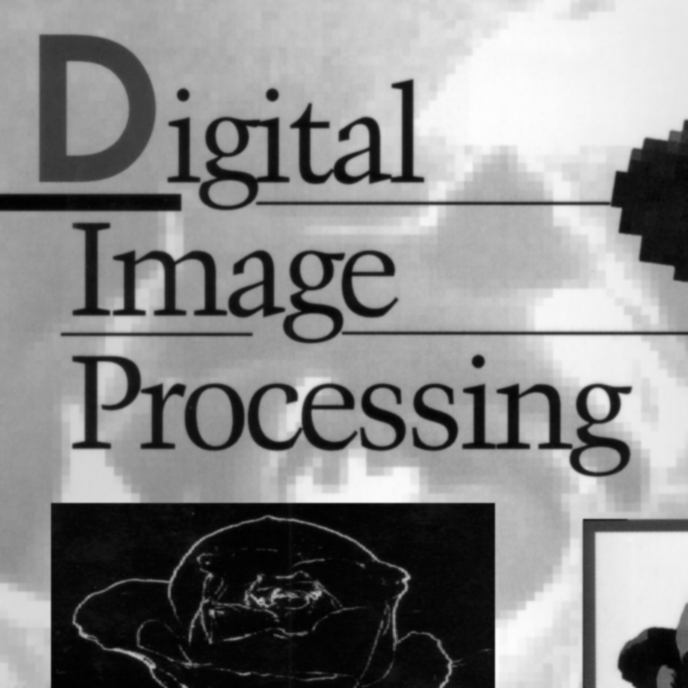

In [2]:
from google.colab import files
myfile = files.upload()

I = cv2.imread('book.tif', cv2.IMREAD_GRAYSCALE)

from google.colab.patches import cv2_imshow 
cv2_imshow(I)

In [170]:
# Step2. 주어진 이미지를 먼저 0~1까지 float 형으로 normalization하세요. (OpenCV의 normalize함수 사용)

I_norm = cv2.normalize(I, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [171]:
# Step3. Step2 결과의 가로와 세로 2배 길이로 zero padding하세요.

I_norm_padded = np.pad(I_norm, ((0, I_norm.shape[0]), (0,I_norm.shape[1])), 'constant', constant_values = 0)

print(I_norm.shape, I_norm_padded.shape)

(688, 688) (1376, 1376)


In [172]:
#  Step4. Step3의 결과를 FFT Shift를 진행하세요. 그리고 FFT를 진행하세요.

I_norm_padded_fftshift = np.fft.fftshift(I_norm_padded) 
I_norm_padded_fft =  np.fft.fft2(I_norm_padded_fftshift)

In [173]:
# Step5. H 커널을 아래 수식을 보고 구현하세요. (a=0.05, b=0.05, T=1)

a = 0.05
b = 0.05
T = 1

P, Q = I_norm_padded.shape
v = np.linspace(0, P-1, P, dtype= int) # height
h = np.linspace(0, Q-1, Q, dtype= int) # width
[X, Y] = np.meshgrid(h-P//2, v-Q//2)


H_kernel = (T/(np.pi*(X*a + Y*b)))*np.sin(np.pi*(X*a + Y*b))*np.exp((-1j)*np.pi*(X*a + Y*b))       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


In [174]:
# Step6. Step5의 결과(H 커널)에서 nan(null)값이 나오는 부분을 T로 바꿔주세요.

H_kernel[np.isnan(H_kernel)] = T

In [175]:
# Step7. Step4의 결과와 Step6의 결과를 곱해주세요. 

I_motionblurred_fft = H_kernel * I_norm_padded_fft

In [176]:
# Step8. Step7의 결과를 Inverse FFT를 하고 그 결과의 real값만 취하세요

I_motionblurred_centered  = np.fft.ifft2(I_motionblurred_fft).real

In [177]:
# Step9. Step8의 결과를 Inverse FFT shift 시키고 crop한 후 255를 곱하고 밝기 값 보정을 위해 일정 값을 더하세요. 그리고 uint8 형으로 형변환하세요

I_motionblurred = np.fft.ifftshift(I_motionblurred_centered)
I_motionblurred = I_motionblurred[0:I.shape[0], 0:I.shape[1]].copy()
alpha = 75
I_motionblurred = np.clip(I_motionblurred * 255 + alpha , 0 , 255)
I_motionblurred = I_motionblurred.astype(np.uint8)

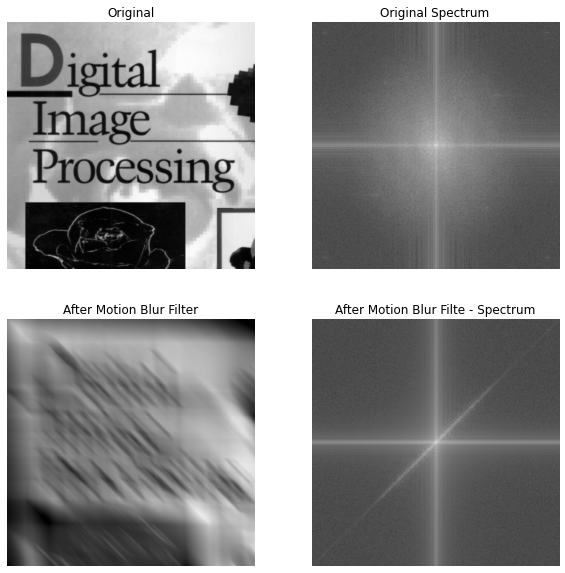

In [178]:
# Step10. 원본 이미지와 원본 이미지와 Step9의 결과, 그리고 각각의 Centered Spectrum을 보여주세요. (log transform 이용) 

fig = plt.figure(figsize = (10, 10))
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
f = np.fft.fft2(I)
f_shift = np.fft.fftshift(f)
o_max = np.max(np.abs(f_shift)) # f_shift의 최대밝기
c = 255 / np.log(o_max) # f_shift의 최대밝기일때 출력의 maximum을 255로 지정
magnitude_spectrum = c * np.log(np.abs(f_shift))
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.set_title('Original Spectrum')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
I_motionblurred_RGB = cv2.cvtColor(I_motionblurred, cv2.COLOR_GRAY2RGB)
ax3.imshow(I_motionblurred_RGB)
ax3.set_title('After Motion Blur Filter')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
f2 = np.fft.fft2(I_motionblurred)
f2_shift = np.fft.fftshift(f2)
o_max2 = np.max(np.abs(f2_shift)) # f_shift의 최대밝기
c2 = 255 / np.log(o_max2) # f_shift의 최대밝기일때 출력의 maximum을 255로 지정
magnitude_spectrum2 = c2 * np.log(np.abs(f2_shift))
ax4.imshow(magnitude_spectrum2, cmap='gray')
ax4.set_title('After Motion Blur Filte - Spectrum')
ax4.axis("off")

plt.show()